In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ";")
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condomínio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.500000,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.000000,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.333333,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.666667,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.000000,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,29.333333,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,1000.0,15.384615,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.428571,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.666667,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,50.000000,50.00,Apartamento


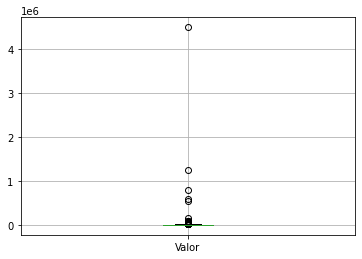

In [3]:
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor']>= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condomínio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,601100.0,9230.769231,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,800900.0,4907.975460,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,551000.0,3666.666667,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,1251506.0,7485.029940,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,4501100.0,15000.000000,15000.00,Apartamento


In [5]:
valor = dados['Valor']

In [6]:
Q1 = valor.quantile(.25)
Q1

1600.0

In [7]:
Q3 = valor.quantile(.75)
Q3

5500.0

In [8]:
IIQ = Q3 - Q1
IIQ

3900.0

In [9]:
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [10]:
print('Limite Inferior {}, Limite Superior {}'.format(limite_inferior, limite_superior))

Limite Inferior -4250.0, Limite Superior 11350.0


In [11]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

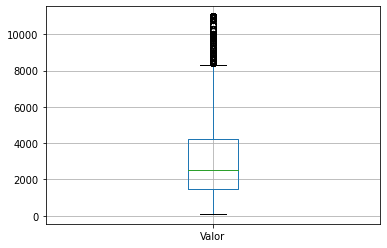

In [13]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd588fd9710>]],
      dtype=object)

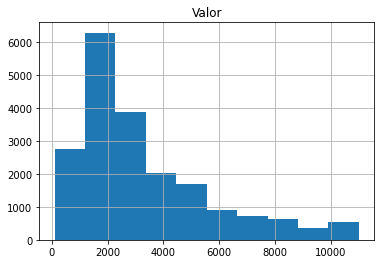

In [14]:
dados_new.hist(['Valor'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


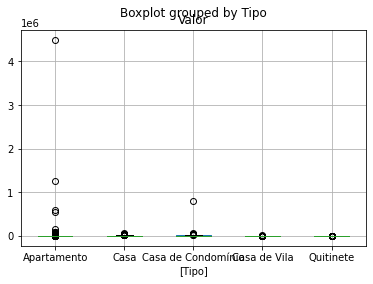

In [15]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [35]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [36]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [37]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [38]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
IIQ
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [39]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [40]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [41]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [42]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [43]:
limite_superior['Casa']

22850.0

In [48]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
  eh_tipo = dados['Tipo'] == tipo
  eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
  selecao = eh_tipo & eh_dentro_limite
  dados_selecao = dados[selecao]
  dados_new = pd.concat([dados_new, dados_selecao])
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condomínio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.333333,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.666667,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.000000,26.00,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.428571,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,1969.0,16.666667,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21687,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,517.0,40.000000,40.00,Apartamento
21728,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,1505.0,39.130435,39.13,Apartamento
21748,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,1423.0,45.833333,45.83,Apartamento
21815,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,1986.0,68.181818,68.18,Apartamento


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


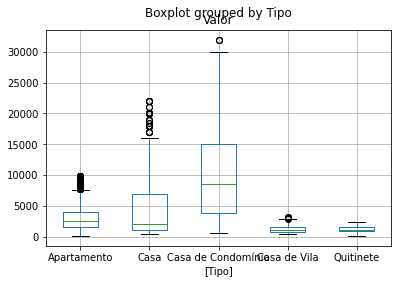

In [49]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [51]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep = ";", index=False)